<a href="https://colab.research.google.com/github/Elwing-Chou/tiba0619/blob/main/sobel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from urllib.request import urlretrieve
url = "https://github.com/Elwing-Chou/tiba0619/raw/main/rabbit.jpg"
urlretrieve(url, "rabbit.jpg")

('rabbit.jpg', <http.client.HTTPMessage at 0x7eb7d8541de0>)

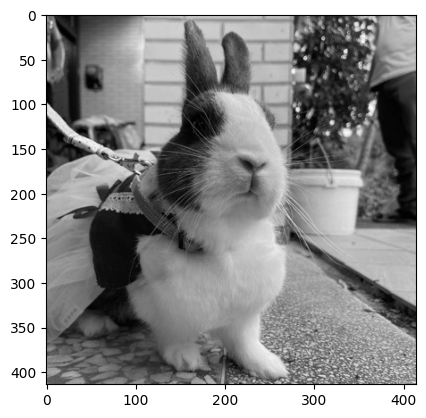

In [16]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

img = Image.open("rabbit.jpg").convert("L").resize((414, 414))
img_np = np.array(img)
plt.imshow(img_np, cmap="gray")

In [17]:
img_np.shape

(414, 414)

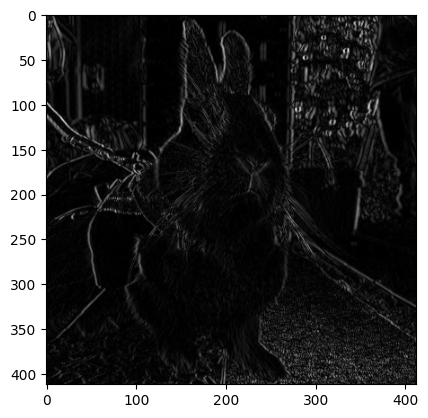

In [24]:
def gx(ci, cj, img):
    w = [
        [1, 0, -1],
        [2, 0, -2],
        [1, 0, -1]
    ]
    total = 0
    for i in range(3):
        for j in range(3):
            ri, rj = ci+i-1, cj+j-1
            total = total + img[ri][rj] * w[i][j]
    return abs(total)

h, w = img_np.shape
new_x = np.zeros(shape=(h-2, w-2))
for i in range(1, h-1):
    for j in range(1, w-1):
        new_x[i-1][j-1] = gx(i, j, img_np)
new_x_norm = (new_x - new_x.min()) / (new_x.max() - new_x.min())
plt.imshow(new_x_norm, cmap="gray")

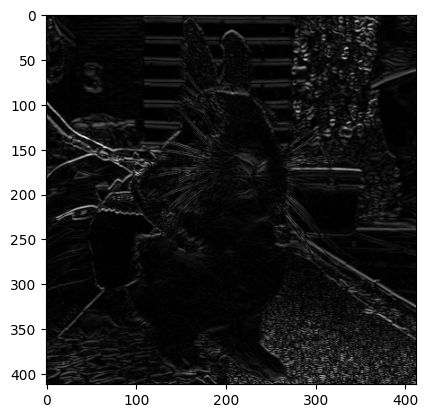

In [22]:
def gy(ci, cj, img):
    w = [
        [1, 2, 1],
        [0, 0, 0],
        [-1, -2, -1]
    ]
    total = 0
    for i in range(3):
        for j in range(3):
            ri, rj = ci+i-1, cj+j-1
            total = total + img[ri][rj] * w[i][j]
    return abs(total)

h, w = img_np.shape
new_y = np.zeros(shape=(h-2, w-2))
for i in range(1, h-1):
    for j in range(1, w-1):
        new_y[i-1][j-1] = gy(i, j, img_np)
new_y_norm = (new_y - new_y.min()) / (new_y.max() - new_y.min())
plt.imshow(new_y_norm, cmap="gray")

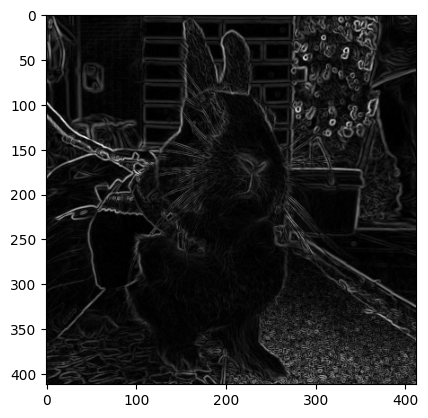

In [23]:
new_total = (new_x_norm ** 2 + new_y_norm ** 2) ** 0.5
plt.imshow(new_total, cmap="gray")